# Importing packages to begin with


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
%matplotlib inline

# Importing dataset

Test and train data is splitted from a single original data. Many features, like total family size etc.,  are better studied when test and train data are together. So, here we import the data and combine them to a single data set.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

df = train_df.append(test_df, sort = True)

In [3]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [53]:
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


# Information about the data 

In [20]:
train_df.info()
print('*' * 50)
print('*' * 50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
**************************************************
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64


# Exploratory Statistics 

In [21]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
train_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Daly, Mr. Peter Denis",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [22]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
test_df.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Baimbrigge, Mr. Charles Robert",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


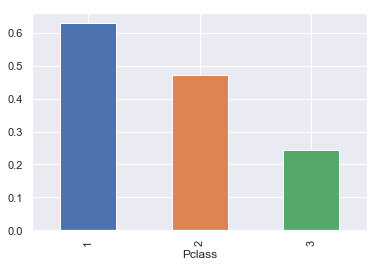

In [52]:
by_pclass = train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean();
print(by_pclass)

by_pclass.plot.bar(x = 'Pclass', y = 'Survived', legend = False)
plt.show()

      Sex  Survived
0  female  0.742038
1    male  0.188908


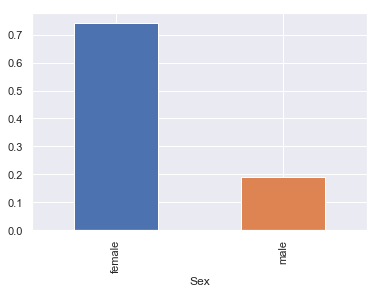

In [51]:
by_sex = train_df[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean();
print(by_sex)

by_sex.plot.bar(x = 'Sex', y = 'Survived', legend = False)
plt.show()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


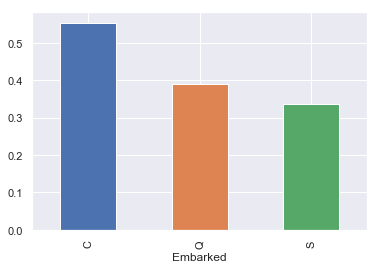

In [63]:
by_embarked = train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean()
print(by_embarked)

by_embarked.plot.bar(x = 'Embarked', y = 'Survived', legend = False)
plt.show()

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


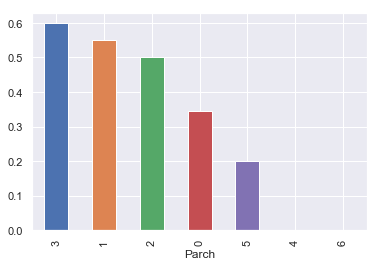

In [73]:
by_parch = train_df[['Parch', 'Survived']].groupby(
    ['Parch'], as_index = False).mean().sort_values(
    by = 'Survived', ascending = False)
print(by_parch)

by_parch.plot.bar(x = 'Parch', y = 'Survived', legend = False)
plt.show()

In [54]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


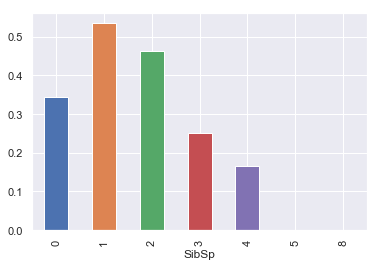

In [82]:
by_sibling = train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean()
print(by_sibling)

by_sibling.plot.bar(x = 'SibSp', y = 'Survived', legend = False)
plt.show()

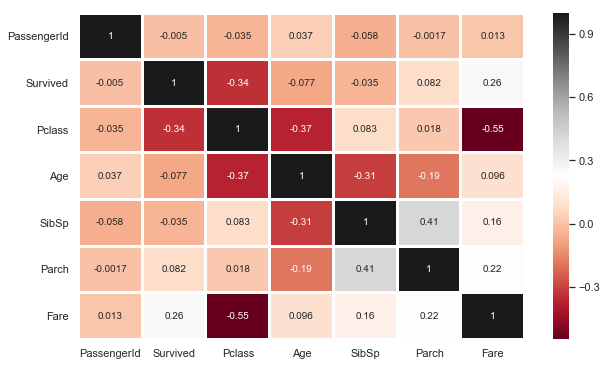

In [6]:
plt.subplots(figsize = (10, 6))
sns.heatmap(train_df.corr(), annot = True, linewidths = 2, cmap = 'RdGy')
plt.show()

# Feature engineering 


## Family size 

In [21]:
df['Family_Size'] = df['Parch'] + df['SibSp']

len_train = len(train_df)

train_df['Family_Size'] = df['Family_Size'][ : len_train]
test_df['Family_Size'] = df['Family_Size'][ len_train : ]

## Age 

Many ages are missing from the dataset. We can fill those ages in many ways. Filling by overall median of the dataset is an option. But I choose to fill the median age of male and female separately. 

In [22]:
df['Title'] = df['Name']
# Cleaning name and extracting Title
for name_string in df['Name']:
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Replacing rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = df.groupby('Title')['Age'].median()[titles.index(title)]
    df.loc[(df['Age'].isnull()) & (df['Title'] == title), 'Age'] = age_to_impute
    
# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Age'] = df['Age'][ : len_train]
test_df['Age'] = df['Age'][ len_train :]

# Dropping Title feature
df.drop('Title', axis = 1, inplace = True)

## Family survival 

In [31]:
df['Last_Name'] = df['Name'].apply(lambda x: str.split(x, ",")[0])
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:",  df.loc[df['Family_Survival'] != 0.5].shape[0])

for _, grp_df in df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " + str(df[df['Family_Survival'] != 0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train_df['Family_Survival'] = df['Family_Survival'][ : len_train]
test_df['Family_Survival'] = df['Family_Survival'][ len_train :]

Number of passengers with family survival information: 420
Number of passenger with family/group survival information: 546


## Fare bins

In [33]:
from sklearn.preprocessing import LabelEncoder

df['Fare'].fillna(df['Fare'].median(), inplace = True)

# Making Bins
df['FareBin'] = pd.qcut(df['Fare'], 5)

label = LabelEncoder()
df['FareBin_Code'] = label.fit_transform(df['FareBin'])

train_df['FareBin_Code'] = df['FareBin_Code'][ : len_train]
test_df['FareBin_Code'] = df['FareBin_Code'][ len_train : ]

train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

## Age bins 

In [35]:
df['AgeBin'] = pd.qcut(df['Age'], 4)

label = LabelEncoder()
df['AgeBin_Code'] = label.fit_transform(df['AgeBin'])

train_df['AgeBin_Code'] = df['AgeBin_Code'][: len_train]
test_df['AgeBin_Code'] = df['AgeBin_Code'][len_train :]

train_df.drop(['Age'], 1, inplace = True)
test_df.drop(['Age'], 1, inplace = True)

## Mapping SEX 

In [36]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

## Dropping unnecessary 

In [37]:
train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)


In [40]:
train_df.head()

,Survived,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,0,3,0,1,0.5,0,0
1,1,1,1,1,0.5,4,3
2,1,3,1,0,0.5,1,1
3,1,1,1,1,0.0,4,2
4,0,3,0,0,0.5,1,2


In [41]:
test_df.head()

,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,3,0,0,0.5,0,2
1,3,1,1,0.5,0,3
2,2,0,0,0.5,1,3
3,3,0,0,0.5,1,1
4,3,1,2,1.0,2,0


# Training the model 

## Input matrix 

In [42]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_test = test_df.copy()

## Feature scaling 

In [44]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'auto', leaf_size = 26, metric = 'minkowski', 
                           metric_params = None, n_jobs = 1, n_neighbors = 6, p = 2, 
                           weights = 'uniform')
knn.fit(X, y)
y_pred = knn.predict(X)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y, y_pred)

0.8608305274971941

# Add cross validation 

# Add leaning curve 

